# **Import Modules**

In [1]:
import time #using time function
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(2017) 
from tensorflow import keras
from keras.models import Sequential #help in creating nueral  network
from keras.layers.convolutional import Convolution2D, MaxPooling2D# use in cnn
from keras.layers import Activation, Flatten, Dense, Dropout# use in cnn
from keras.layers.normalization import BatchNormalization# use in learning parameter.
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models# import dataset
import tensorflow as tf# tensorflow function implementing neural network
from tensorflow import keras # import keras library
import matplotlib.pyplot as plt # use in ploting
!pip install keras

# **Load CIFAR10 Dataset and Data Exploration**

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()#divide dataset into train and test feature
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))# count the number of classes.

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

print('---------------------------------')
print('X-Train Shape:', X_train.shape)
print('y-Train Shape:', y_train.shape)
print('---------------------------------')
print('X-Test Shape: ', X_test.shape)
print('y-Test Shape: ', y_test.shape)
print('---------------------------------')

---------------------------------
X-Train Shape: (50000, 32, 32, 3)
y-Train Shape: (50000, 1)
---------------------------------
X-Test Shape:  (10000, 32, 32, 3)
y-Test Shape:  (10000, 1)
---------------------------------


The above cell output shows that input has 50000 image having dimension 32-32-3
and test output have 10000 image which contain only type of class.

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough, so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

y_train is now a 1D array


In [7]:
y_test = y_test.reshape(-1,)
y_test[:5]
y_test.shape

(10000,)

In [8]:
print('Final Shape of Datasets:')
print('---------------------------------')
print('X-Train Shape:', X_train.shape)
print('y-Train Shape:', y_train.shape)
print('---------------------------------')
print('X-Test Shape: ', X_test.shape)
print('y-Test Shape: ', y_test.shape)
print('---------------------------------')

Final Shape of Datasets:
---------------------------------
X-Train Shape: (50000, 32, 32, 3)
y-Train Shape: (50000,)
---------------------------------
X-Test Shape:  (10000, 32, 32, 3)
y-Test Shape:  (10000,)
---------------------------------


# **Data Preparation and Normalization**
we need our output in terms of binary class so that we can match our desired output.

Normalization is neccesary to avoid effect of outliers.All the pixel value will lie in the range of 0 to 1 having zero mean.

We also need to tranform our image dimension to 1D so that We can use a list of pixel value as our input varibale.i.e 3072 input variable we have for a single image.

In [9]:
#--- COVERTING CLASS LABELS TO BINARY CLASS LABELS
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test = np_utils.to_categorical(y_test, num_classes = 10)

#--- TRANSFORM IMAGES FROM (32, 32, 3) TO 3072-DIMENSIONAL VECTORS (32*32*3)
X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))

#--- NORMALIZATION OF PIXEL VALUES (TO [0 - 1] RANGE)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# **[a]- MLP (MultiLayer Perceptron) Classifier**

MLP is the most basic neural network after Mp neuron.
Any function can be implemnetd using MLP.

In [10]:
# import required library for generating neural network.
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [11]:
model = Sequential()# Neural network object created
model.add(Dense(256, activation='relu', input_dim=3072))# we are using 3 hidden layer in this MLP model.
model.add(Dense(256, activation='relu'))# Relu function used in between hidden layer.
model.add(Dense(10, activation='softmax'))# since our output is in multi binary class,therefore we have to use softmax activation function.
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)# define learning algorithm and its parameter, it is the most important step in neural network
#because it only update weights.

model.compile(optimizer=sgd,
              loss='categorical_crossentropy', # we are using cross entropy objective function.
              metrics=['accuracy'])


## Model description:

In [12]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7ff4759dc190>>

# Training the MLP-
Let's train our model now! We will store the training loss values and metrics in a history object, so we can visualize the training process later. We are going to train the model for 15 epochs, using a batch size of 32 and a validation split of 0.2. The latter means that 20% of our training data will be used as validation samples (in practice however it is advised to separate the validation data from the training data altogether).

In [13]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 17s - loss: 1.8305 - accuracy: 0.3332 - val_loss: 1.7151 - val_accuracy: 0.3922
Epoch 2/15
1250/1250 - 3s - loss: 1.6639 - accuracy: 0.4017 - val_loss: 1.6832 - val_accuracy: 0.4047
Epoch 3/15
1250/1250 - 3s - loss: 1.5905 - accuracy: 0.4299 - val_loss: 1.6238 - val_accuracy: 0.4163
Epoch 4/15
1250/1250 - 3s - loss: 1.5428 - accuracy: 0.4448 - val_loss: 1.5968 - val_accuracy: 0.4373
Epoch 5/15
1250/1250 - 3s - loss: 1.5041 - accuracy: 0.4609 - val_loss: 1.5318 - val_accuracy: 0.4579
Epoch 6/15
1250/1250 - 3s - loss: 1.4744 - accuracy: 0.4726 - val_loss: 1.5504 - val_accuracy: 0.4488
Epoch 7/15
1250/1250 - 3s - loss: 1.4431 - accuracy: 0.4816 - val_loss: 1.5436 - val_accuracy: 0.4657
Epoch 8/15
1250/1250 - 3s - loss: 1.4224 - accuracy: 0.4897 - val_loss: 1.4983 - val_accuracy: 0.4748
Epoch 9/15
1250/1250 - 3s - loss: 1.3970 - accuracy: 0.4992 - val_loss: 1.5209 - val_accuracy: 0.4675
Epoch 10/15
1250/1250 - 3s - loss: 1.3759 - accuracy: 0.5054 - val_loss: 1.5221 -

## Plot the losses
Train loss vs validation losses

In [14]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model - Loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

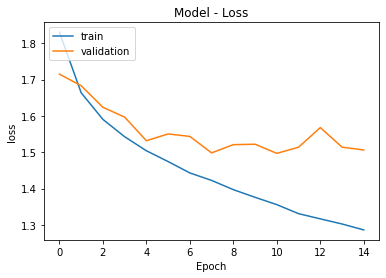

In [15]:
plotLosses(history)

Observation:

Both training and validation loss decrease as the number of epoch increase.

Train loss sharply decarse after two epoches but validtion loss decrease slowly.

After 14 epoch validation loss become almost stagnent.

# Evaluating the MLP

In [16]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.4871087074279785, 0.4790000021457672]


After implementing MLP we Observe accuracy 47% which is very low. 

so we will try different model and see wether accuarcy can be increased.

# **[b]- CNN (Convolutional Neural Network) Classifier**

# Dataset Preparation 

In [17]:
!pip install np_utils

     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-cp37-none-any.whl size=57133 sha256=152e57effa283a7bd0b9069c9d29c7f5980aba8b624d8f34907b35026286d85a
  Stored in directory: /root/.cache/pip/wheels/92/4b/81/206efd0d01330a96f3aebe5021d2d5f0b264b7ade827c306ef
Successfully built np-utils


In [18]:
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)# convert dta into categorical type
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


# Creating CNN Model

In [20]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 1,618,602
Trainable params: 1,618,602
Non-trainable params: 0
____________________________________________

##Model description:

In [21]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7ff4600c4590>>

# Training the CNN-

In [22]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 34s - loss: 1.5415 - accuracy: 0.4430 - val_loss: 1.2737 - val_accuracy: 0.5505
Epoch 2/15
1250/1250 - 4s - loss: 1.1059 - accuracy: 0.6084 - val_loss: 1.0522 - val_accuracy: 0.6273
Epoch 3/15
1250/1250 - 4s - loss: 0.8690 - accuracy: 0.6938 - val_loss: 1.0013 - val_accuracy: 0.6573
Epoch 4/15
1250/1250 - 4s - loss: 0.6700 - accuracy: 0.7640 - val_loss: 1.0565 - val_accuracy: 0.6621
Epoch 5/15
1250/1250 - 4s - loss: 0.4666 - accuracy: 0.8376 - val_loss: 1.1325 - val_accuracy: 0.6597
Epoch 6/15
1250/1250 - 4s - loss: 0.3044 - accuracy: 0.8956 - val_loss: 1.3067 - val_accuracy: 0.6651
Epoch 7/15
1250/1250 - 4s - loss: 0.2016 - accuracy: 0.9302 - val_loss: 1.5339 - val_accuracy: 0.6561
Epoch 8/15
1250/1250 - 4s - loss: 0.1591 - accuracy: 0.9448 - val_loss: 1.6461 - val_accuracy: 0.6627
Epoch 9/15
1250/1250 - 4s - loss: 0.1238 - accuracy: 0.9572 - val_loss: 1.8127 - val_accuracy: 0.6525
Epoch 10/15
1250/1250 - 4s - loss: 0.1176 - accuracy: 0.9605 - val_loss: 1.9603 -

## Plot the losses
Train loss vs validation losses

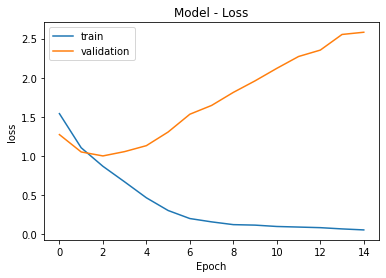

In [23]:
plotLosses(history)

Observation:

-Training error is steady and very low, it is not changing with the number of epoch.

-Validation error increase as the epoch increasing.

# Evaluating the CNN

In [24]:
score1 = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [25]:
print(model.metrics_names)
print(score1)

['loss', 'accuracy']
[2.5866360664367676, 0.6467999815940857]


After implementing MLP we Observe accuracy 64% which is better than MLP model 

Still we will try different model and see wether accuarcy can be increased.

# **[c]- TensorFlow**

We will do some changes in the model and try to implement again.

In [26]:
import tensorflow as tf   
  
# Display the version
print(tf.__version__)  

2.5.0


In [27]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [28]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [29]:
# Reduce pixel values

X_train, X_test = X_train / 255.0, X_test / 255.0
  
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

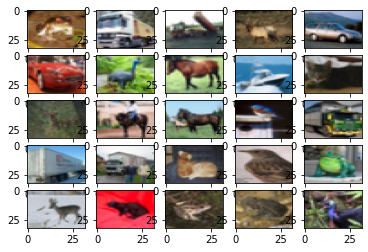

In [30]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)

k = 0
  
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1
  
plt.show()

In [31]:
# number of classes
K = len(set(y_train))
  
# calcutate total numer of clases 
# for output layer
print("number of classes:", K)

number of classes: 10


In [32]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [33]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Fit
r = model.fit(
  X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2841 - accuracy: 0.5600 - val_loss: 0.9669 - val_accuracy: 0.6526
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8320 - accuracy: 0.7088 - val_loss: 0.8385 - val_accuracy: 0.7061
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6836 - accuracy: 0.7650 - val_loss: 0.6813 - val_accuracy: 0.7714
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5802 - accuracy: 0.8017 - val_loss: 0.6532 - val_accuracy: 0.7750
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4878 - accuracy: 0.8311 - val_loss: 0.6402 - val_accuracy: 0.7897
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4192 - accuracy: 0.8562 - val_loss: 0.5992 - val_accuracy: 0.8074
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3514 - accuracy: 0.8794 - val_loss: 0.6492 - val_ac

In [35]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
  
r = model.fit(train_generator, validation_data=(X_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.5473 - accuracy: 0.8268 - val_loss: 0.4759 - val_accuracy: 0.8437
Epoch 2/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.4330 - accuracy: 0.8563 - val_loss: 0.4772 - val_accuracy: 0.8467
Epoch 3/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.4103 - accuracy: 0.8642 - val_loss: 0.4651 - val_accuracy: 0.8473
Epoch 4/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.3791 - accuracy: 0.8743 - val_loss: 0.4402 - val_accuracy: 0.8551
Epoch 5/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3697 - accuracy: 0.8763 - val_loss: 0.4674 - val_accuracy: 0.8599
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3502 - accuracy: 0.8839 - val_loss: 0.4315 - val_accuracy: 0.8630
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3371 - accuracy: 0.8867 - val_loss: 0.4335 -

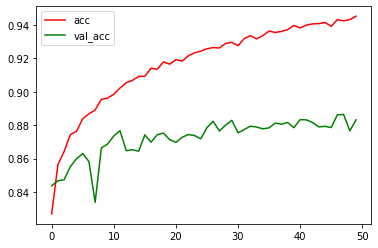

In [36]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

OBSERVATION:

-Validation accuracy and Accuracy increase on every epoch.

## TESTING ON SINGLE IMAGE INPUT

Originaxl label is cat and predicted label is cat


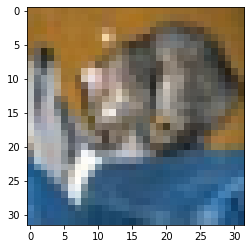

In [37]:
# label mapping
  
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
  
# select the image from our test dataset
image_number = 0
  
# display the image
plt.imshow(X_test[image_number])
  
# load the image in an array
n = np.array(X_test[image_number])
  
# reshape it
p = n.reshape(1, 32, 32, 3)
  
# pass in the network for prediction and 
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
  
# load the original label
original_label = labels[y_test[image_number]]
  
# display the result
print("Originaxl label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [38]:
# save the model
model.save('Machine Learning Course Project.h5')

# **[d]- Logistic Regression**



*   List item
*   List item


First, we load our CIFAR-10 dataset.
Then, we upload images in batches of 100 at a time.
Then, we convert our images into 3x32x32 tensors. This makes our batch matrix 100 x 3 x 32 x 32 in dimensions.
Then, we pass each batch into the CIFAR10 model, which converts the tensors from 100 x 3 x 32 x 32 to 100 x 3072.
Then, we multiply it by the weights matrix, which is [10 x 3072], which is transposed to be multiplied by each tensor batch
This multiplication gives a 100 x 10 results matrix, with logits, and we add the bias.
Then, softmax is applied on the logits to convert them into probabilities
Then, cross entropy is performed on the probabilites matrix to give a continuous and differentiable cost function.
Then, cross entropy from all the different batches is combined to give a total training loss.
Then we calculate the partial derivatives of this cross entropy function with respect to every one of the 10x3072 weights and biases.
Then, we subtract the gradient (the vector of all 10x3072 partial derivatives) from the vector of current thetas, for each batch. (so, youre subtracting from theta 100 times)
We do step 11 for each number of epochs.






In [39]:
import torch
from pathlib import Path
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [40]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)
# labels 
classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('-----------------------------')
print('length of training set: ' + str(len(trainset)))
print('length of test set: ' + str(len(testset)))
print('-----------------------------')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
-----------------------------
length of training set: 50000
length of test set: 10000
-----------------------------


In [41]:
trainset[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF33443D510>, 6)

this is an image of a frog


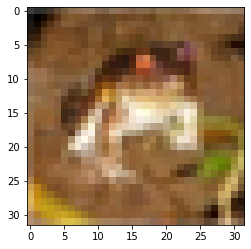

In [42]:
example = 0
image, label = trainset[example] #since each element of the trainset list is itself a tuple with the image details, and then the label
print("this is an image of a " + classes[(trainset[example])[1]]) # first index into tuple in trainset, then the 2nd value (label), and then the classes
plt.imshow(image)

# Transforming images into matrices of color values

In [43]:
import torchvision.transforms as transforms

In [44]:
datasetT = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [45]:
example = 5
imgTensor, label = datasetT[example]
print('size of image matrix: ' + str(imgTensor.shape))
print("this is an image of a " + classes[(trainset[example])[1]])

size of image matrix: torch.Size([3, 32, 32])
this is an image of a automobile


In [46]:
print(imgTensor[:, 0:2, 0:2])

tensor([[[0.6235, 0.5882],
         [0.5569, 0.5725]],

        [[0.4000, 0.3569],
         [0.2941, 0.2824]],

        [[0.3961, 0.3725],
         [0.2667, 0.2588]]])


R channel of image 0 in dataset


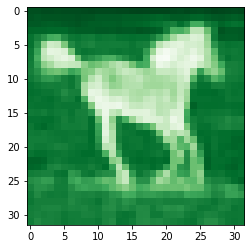

In [47]:
example = 21344
imgTensor, label = datasetT[example]
plt.imshow(imgTensor[1, 0:32, 0:32], cmap='Greens')
# change the 0 to 1 or 2 for different color channels.
print("R channel of image 0 in dataset")

# Splitting up dataset into Training and Validation sets

In [48]:
#length of training examples.
m = 50000 

#percentage of m dedicated to CV.  
pCV = 0.2

# give the amount of examples dedicated to CV. 
mCV = int(m*pCV)
print("amount of training examples: " + str(m - mCV))
print("amount of cross validation examples: " + str(mCV))

amount of training examples: 40000
amount of cross validation examples: 10000


In [49]:
def splitIndices(m, pCV):
  """ randomly shuffle a training set's indices, then split the indices into training and cross validation sets.
   Pass in 'm', length of training set, and 'pCV', the percentage of the training set you would like 
   to dedicate to cross validation."""
   
  # determine size of CV set.
  mCV = int(m*pCV)

  #create random permutation of 0 to m-1 - randomly shuffle all values from 0 to m.
  indices = np.random.permutation(m)

  #pick first mCV indices for training, and then validation.
  return indices[mCV:], indices[:mCV]

In [50]:
trainIndices, valIndices = splitIndices(m, pCV)

# print the first few indices of the training set, and first few of the validation set, as a sanity check to see that they are shuffled.
print("length of training set: " + str(len(trainIndices)))
print("length of cross validation set: " + str(len(valIndices)))
print()
print('sample validation indices: ' + str(list(valIndices[0:8])))
print('sample educational indices: ' + str(list(trainIndices[0:8])))

length of training set: 40000
length of cross validation set: 10000

sample validation indices: [2893, 37178, 43173, 22394, 17259, 7171, 30602, 21252]
sample educational indices: [21496, 15838, 49232, 39383, 21964, 21584, 1666, 9388]


# The below code does the same as the above.

In [51]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [52]:
batchSize = 100

# TRAIN SET

# training sampler and data loader - creates a SubsetRandomSampler object that takes random samples of the numbers in trainIndices, or random indices.
trainSampler = SubsetRandomSampler(trainIndices)


# training loader - creates a dataloader object which takes the indices from trainSampler, 
# and when given batchSize, takes random batches of batchSize from the indices list, and then pairs it with
# the respective dataset in datasetT
trainLoader = DataLoader(datasetT, batchSize, sampler=trainSampler)

print(list(trainLoader))

# VALIDATION SET

valSampler = SubsetRandomSampler(valIndices)
valLoader = DataLoader(datasetT, batchSize, sampler=valSampler)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# LOGISTIC REGRESSION MODEL

In [53]:
import torch.nn as nn

# this will dictate the rows of the theta matrix
inputSize = 3*32*32

# this will dictate the columns of the theta matrix
numClasses = 10

# create our linear regression model (nn.Linear creates bias terms for us)
model = nn.Linear(inputSize, numClasses)

print('dimensions of weight matrix: ' + str(model.weight.shape))
print(model.weight)

# BELOW LIST OF LEARN WEIGHT

dimensions of weight matrix: torch.Size([10, 3072])
Parameter containing:
tensor([[-0.0041, -0.0067, -0.0065,  ..., -0.0088, -0.0176, -0.0101],
        [-0.0126, -0.0035,  0.0063,  ...,  0.0045, -0.0180, -0.0135],
        [ 0.0165,  0.0095, -0.0060,  ..., -0.0137, -0.0126,  0.0165],
        ...,
        [ 0.0103, -0.0032,  0.0077,  ..., -0.0043, -0.0111, -0.0078],
        [-0.0069, -0.0056,  0.0070,  ...,  0.0006,  0.0029, -0.0110],
        [ 0.0070, -0.0021, -0.0051,  ..., -0.0130,  0.0013, -0.0082]],
       requires_grad=True)


In [54]:
#PRINT THE LABEL WITH CORRESPONDING IMAGES.
for images, labels in trainLoader: 
   print(labels)
   

tensor([1, 6, 4, 5, 2, 7, 0, 1, 9, 9, 2, 0, 4, 7, 4, 9, 8, 9, 8, 0, 7, 9, 5, 3,
        4, 7, 4, 8, 7, 1, 2, 5, 5, 7, 6, 1, 4, 8, 1, 1, 3, 4, 5, 7, 7, 9, 1, 5,
        7, 0, 5, 9, 7, 5, 0, 1, 8, 2, 6, 9, 7, 3, 2, 9, 5, 1, 7, 3, 0, 9, 6, 5,
        3, 9, 7, 2, 7, 1, 7, 7, 2, 6, 0, 0, 8, 2, 7, 0, 4, 2, 9, 6, 2, 7, 0, 2,
        1, 9, 3, 9])
tensor([5, 2, 7, 1, 1, 1, 6, 0, 1, 7, 0, 6, 6, 4, 8, 3, 4, 3, 2, 8, 1, 9, 9, 0,
        8, 3, 0, 6, 7, 7, 3, 6, 4, 7, 9, 0, 1, 8, 0, 9, 1, 4, 4, 6, 1, 3, 9, 2,
        5, 3, 3, 4, 4, 7, 7, 9, 7, 4, 4, 0, 2, 1, 1, 8, 6, 8, 1, 0, 8, 3, 1, 3,
        5, 3, 3, 7, 9, 2, 1, 7, 6, 2, 2, 9, 4, 1, 9, 9, 2, 9, 0, 3, 2, 0, 1, 2,
        9, 7, 1, 3])
tensor([7, 4, 4, 7, 0, 9, 2, 3, 5, 1, 9, 2, 8, 5, 0, 2, 1, 0, 4, 4, 2, 6, 4, 4,
        2, 2, 3, 0, 3, 6, 0, 0, 4, 4, 7, 3, 8, 0, 9, 0, 6, 7, 2, 6, 8, 7, 8, 4,
        7, 4, 4, 5, 1, 1, 5, 9, 1, 7, 0, 3, 7, 9, 9, 2, 9, 6, 9, 7, 9, 1, 4, 5,
        1, 5, 3, 2, 5, 4, 5, 9, 1, 7, 9, 7, 9, 6, 5, 6, 8, 3, 4, 5, 7, 6, 4, 4

In [55]:
class CIFAR10(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(inputSize, numClasses)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 3072)
        out = self.linear(xb)
        return out
    
model = CIFAR10()

print(model.linear.weight.shape)
print(model.linear.bias.shape)

torch.Size([10, 3072])
torch.Size([10])


In [56]:
for images, labels in trainLoader:
    outputs = model(images)
    break

print('outputs.shape :', outputs.shape)
print('sample outputs :\n', outputs[:2]) # print 2 out of the 100 rows of the total output vector

outputs.shape : torch.Size([100, 10])
sample outputs :
 tensor([[ 0.1293,  0.0612, -0.4267,  0.3033, -0.3180, -0.1179,  0.4581, -0.1057,
         -0.1962,  0.1594],
        [-0.2093, -0.1764, -0.8409,  0.3803, -0.3024,  0.0015,  0.4275, -0.3272,
         -0.4700,  0.5201]], grad_fn=<SliceBackward>)


In [57]:
import torch.nn.functional as F

In [58]:
# CONVERT ABOVE OUTPUT INTO PROBABILITIES
# apply the softmax for each output row in our 100 x 10 output (with batch size 100)
probs = F.softmax(outputs, dim=1)

# look at some sample probabilities
print("sample probabilities:\n", probs[:2].data)
# add up the probabilities of each row for a sanity check that they equal 1 now
print(sum(list(probs[0])))

sample probabilities:
 tensor([[0.1105, 0.1032, 0.0634, 0.1315, 0.0706, 0.0863, 0.1535, 0.0874, 0.0798,
         0.1139],
        [0.0824, 0.0851, 0.0438, 0.1486, 0.0751, 0.1017, 0.1557, 0.0732, 0.0635,
         0.1709]])
tensor(1., grad_fn=<AddBackward0>)


In [59]:
maxProbs, preds = torch.max(probs, dim=1) #torch.max returns the max value itself (maxProbs) as well as the index of the prediction (preds)
print(preds)
print(maxProbs)

tensor([6, 9, 6, 9, 3, 6, 9, 3, 3, 6, 6, 6, 6, 6, 6, 3, 6, 3, 6, 9, 3, 6, 6, 3,
        6, 6, 6, 6, 3, 6, 9, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6,
        3, 3, 6, 6, 9, 6, 3, 6, 6, 6, 3, 3, 6, 6, 6, 3, 3, 3, 6, 6, 3, 3, 3, 6,
        6, 3, 6, 6, 3, 3, 6, 9, 9, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 9, 3, 6,
        9, 3, 6, 6])
tensor([0.1535, 0.1709, 0.1274, 0.1544, 0.1380, 0.1521, 0.1452, 0.1433, 0.1719,
        0.1325, 0.1712, 0.1531, 0.1582, 0.1356, 0.1426, 0.1380, 0.1535, 0.1585,
        0.1348, 0.1324, 0.1506, 0.1296, 0.1230, 0.1571, 0.1413, 0.1236, 0.1380,
        0.1209, 0.1454, 0.1498, 0.1413, 0.1524, 0.1687, 0.1466, 0.1893, 0.1359,
        0.1519, 0.1888, 0.1973, 0.1229, 0.1601, 0.1478, 0.1306, 0.1362, 0.1517,
        0.1445, 0.1503, 0.1772, 0.1364, 0.1462, 0.1416, 0.1482, 0.1392, 0.1509,
        0.1557, 0.1436, 0.1485, 0.1364, 0.1647, 0.1415, 0.1327, 0.1498, 0.1589,
        0.1295, 0.1556, 0.1513, 0.1553, 0.1501, 0.1412, 0.1499, 0.2041, 0.1561,
        0.1140, 0.1

# Evaluation and Cost function

In [60]:
labels==preds

tensor([False,  True, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True, False, False, False, False, False,
        False, False, False, False,  True, False,  True, False, False, False,
         True, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,  True,
         True, False,  True,  True, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False,  True, False, False, False, False])

In [61]:
def accuracy(preds, labels):
  return torch.sum(labels==preds).item() / len(labels)

EVALUATION OF LOGISTIC REGRESSION:

In [62]:
accuracy(preds, labels)

0.15

In [63]:
lossFn = F.cross_entropy
# loss for current batch of data
# remember that outputs are our thetas gathered from the model
# labels is correct answers from dataLoader
loss = lossFn(outputs, labels)
print(loss)

tensor(2.3216, grad_fn=<NllLossBackward>)


Since loss and accurcay are very bad. we need some hyperparameter tuning

# Optimization using SDG (stochastic gradient descent)

In [64]:
learningRate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# Training the model

In [65]:
# recall that xb is the X (a list batchSize long of 3x32x32 images) for a batch. yb is the corresponding labels for those images.

def lossBatch(model, lossFn, xb, yb, opt=None, metric=None):
  # calculate the loss
  preds = model(xb)
  loss = lossFn(preds, yb)

  if opt is not None:
    # compute gradients
    loss.backward()
    # update parameters
    opt.step()
    # reset gradients to 0 (don't want to calculate second derivatives!)
    opt.zero_grad()

  metricResult = None
  if metric is not None:
    metricResult = metric(preds, yb)

  return loss.item(), len(xb),  metricResult

In [66]:
def evaluate(model, lossFn, validDL, metric=None):
  #with torch.no_grad (this was causing an error)
  
  # pass each batch of the validation set through the model to form a multidimensional list (holding loss, length and metric for each batch)
  # the reason why we made optimization optional is so we can reuse the function here
  results = [lossBatch(model, lossFn, xb, yb, metric=metric,) for xb,yb in validDL]

  # separate losses, counts and metrics
  losses, nums, metrics = zip(*results)

  # total size of the dataset (we keep track of lengths of batches since dataset might not be perfectly divisible by batch size)
  total = np.sum(nums)

  # find average total loss over all batches in validation (remember these are all vectors doing element wise operations.)
  avgLoss = np.sum(np.multiply(losses, nums))/total

  # if there is a metric passed, compute the average metric
  if metric is not None:
    # avg of metric accross batches
    avgMetric = np.sum(np.multiply(metrics, nums)) / total

  return avgLoss, total, avgMetric

In [67]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1) # underscore discards the max value itself, we don't care about that
  return torch.sum(preds == labels).item() / len(preds)

In [68]:
E = evaluate(model, lossFn, valLoader, metric=accuracy)

print("training set loss: ", loss)
print("cross validation set loss: ", E[0])

training set loss:  tensor(2.3216, grad_fn=<NllLossBackward>)
cross validation set loss:  2.330905694961548


In [69]:
def fit(epochs, model, lossFn, opt, trainDL, valDL, metric=None):
  valList = [0.10]
  for epoch in range(epochs):
    # training - perform one step gradient descent on each batch, then moves on
    for xb, yb in trainDL: 
      loss,_,lossMetric = lossBatch(model, lossFn, xb, yb, opt)
      

    # evaluation on cross val dataset - after updating over all batches, technically one epoch
    # evaluates over all validation batches and then calculates average val loss, as well as the metric (accuracy)
    valResult = evaluate(model, lossFn, valDL, metric)
    valLoss, total, valMetric = valResult
    valList.append(valMetric)
    # print progress
    if metric is None: 
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, epochs, valLoss))
    else:
      print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch + 1, epochs, valLoss, metric.__name__, valMetric))

  return valList

In [70]:
# redefine model and optimizer
learningRate = 0.009
model = CIFAR10()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [71]:
trainList = fit(100, model, lossFn, optimizer, trainLoader, valLoader, metric=accuracy)

Epoch [1/100], Loss: 1.8988, accuracy: 0.3362
Epoch [2/100], Loss: 1.8452, accuracy: 0.3634
Epoch [3/100], Loss: 1.8177, accuracy: 0.3632
Epoch [4/100], Loss: 1.8395, accuracy: 0.3492
Epoch [5/100], Loss: 1.8124, accuracy: 0.3696
Epoch [6/100], Loss: 1.7999, accuracy: 0.3651
Epoch [7/100], Loss: 1.7811, accuracy: 0.3814
Epoch [8/100], Loss: 1.7688, accuracy: 0.3875
Epoch [9/100], Loss: 1.7926, accuracy: 0.3696
Epoch [10/100], Loss: 1.7611, accuracy: 0.3896
Epoch [11/100], Loss: 1.7742, accuracy: 0.3747
Epoch [12/100], Loss: 1.7687, accuracy: 0.3794
Epoch [13/100], Loss: 1.7712, accuracy: 0.3792
Epoch [14/100], Loss: 1.7493, accuracy: 0.3930
Epoch [15/100], Loss: 1.7393, accuracy: 0.4028
Epoch [16/100], Loss: 1.7598, accuracy: 0.3811
Epoch [17/100], Loss: 1.7423, accuracy: 0.3988
Epoch [18/100], Loss: 1.7393, accuracy: 0.3982
Epoch [19/100], Loss: 1.7338, accuracy: 0.4024
Epoch [20/100], Loss: 1.7364, accuracy: 0.4065
Epoch [21/100], Loss: 1.7272, accuracy: 0.4050
Epoch [22/100], Loss: 

In [72]:
test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

Files already downloaded and verified


In [73]:
testLoader = DataLoader(test, batchSize)

In [74]:
avgLoss, total, avgMetric = evaluate(model, F.cross_entropy, testLoader, metric=accuracy)
print("test set accuracy: \n", avgMetric*100,"%")
avgLoss, total, avgMetric = evaluate(model, F.cross_entropy, valLoader, metric=accuracy)
print("cross validation set accuracy: \n",avgMetric*100,"%")
avgLoss, total, avgMetric = evaluate(model, F.cross_entropy, trainLoader, metric=accuracy)
print("training set accuracy: \n",avgMetric*100,"%")

test set accuracy: 
 40.64 %
cross validation set accuracy: 
 41.57 %
training set accuracy: 
 44.800000000000004 %


After hyperparameter tuning Accuracy of logistic regression  has improved.